In [5]:
#read the data
import pandas as pd
df = pd.read_csv('/Users/srividyaraghavan/Downloads/housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
#convert into dataset array
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [7]:
#split into input/output -- X is first 10 feature columns, Y is last column with output
X = dataset[:,0:10]
Y = dataset[:,10]

In [8]:
#preprocesses the data to be between 0 and 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
#split into train, test, and validation for X and Y
#training = 70%; validation and test = 15%

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [12]:
#creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential([
    #hidden layer 1: RELU, 32 neurons
    Dense(32, activation='relu', input_shape=(10,)),
    #hidden layer 2: RELU, 32 neurons
    Dense(32, activation='relu'),
    #output layer: sigmoid, 1 neuron 
    Dense(1, activation='sigmoid'),
])

In [14]:
model.compile(optimizer='sgd',
              #loss func that takes 0 or 1
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
#see accuracy from the training set and validation set
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.7163 - accuracy: 0.5068 - val_loss: 0.7036 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7016 - accuracy: 0.5068 - val_loss: 0.6926 - val_accuracy: 0.5205
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.4990 - val_loss: 0.6849 - val_accuracy: 0.5342
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.6614 - val_loss: 0.6787 - val_accuracy: 0.7489
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.7573 - val_loss: 0.6731 - val_accuracy: 0.7763
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6701 - accuracy: 0.7515 - val_loss: 0.6675 - val_accuracy: 0.7671
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.7691 - val_loss: 0.6612 - val_accuracy: 0.7991
Epoch 8/100


In [19]:
model.evaluate(X_test, Y_test)[1]
#index 1 because it's accuracy, index 0 is loss

7/7 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.9269


0.9269406199455261

In [43]:
yhat = model.predict(X_test)
#connect predictions with outputs
for i in range(10):
	print(i+1, yhat[i])
    #prints the prediction for the specified column for 10 tests, can visually check accuracy with the
    #dataset


1 [0.5528077]
2 [0.16086566]
3 [0.9893604]
4 [0.13190356]
5 [0.97372246]
6 [0.42399886]
7 [0.23591137]
8 [0.7122307]
9 [0.09399179]
10 [0.07692868]


### Visualizing loss and accuracy - plotting

#plot loss for train and val
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

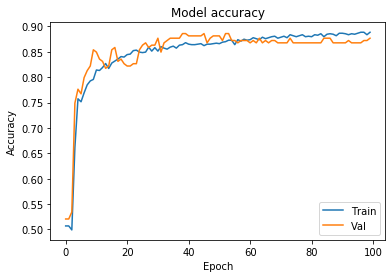

In [23]:
#plot accuracy for train and val

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
#Regularization - tuning the activation function

#practice by creating an overfitted model, then fixing it w regularization
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [25]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 41ms/step - loss: 0.5617 - accuracy: 0.7241 - val_loss: 0.4180 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 1s 43ms/step - loss: 0.3695 - accuracy: 0.8483 - val_loss: 0.3264 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3295 - accuracy: 0.8650 - val_loss: 0.2966 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3066 - accuracy: 0.8836 - val_loss: 0.2792 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 0.2845 - accuracy: 0.8885 - val_loss: 0.2916 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2638 - accuracy: 0.8826 - val_loss: 0.2386 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 41ms/step - loss: 0.3028 - accuracy: 0.8748 - val_loss: 0.2643 - val_accuracy: 0.8767
Epoch 

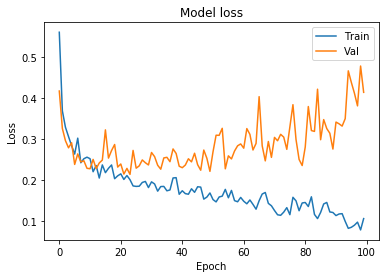

In [27]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#This is overfitted. The training set has very low loss, but when shown new data, the model is very inaccurate

In [30]:
#Regularize using L2 reg

from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [31]:
#create new model with regularization
model_3 = Sequential([
    
    #includes squared values from loss function
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 56ms/step - loss: 14.2281 - accuracy: 0.6370 - val_loss: 3.8989 - val_accuracy: 0.7443
Epoch 2/100
32/32 [==============================] - 2s 47ms/step - loss: 1.6825 - accuracy: 0.8180 - val_loss: 0.6958 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 2s 46ms/step - loss: 0.5944 - accuracy: 0.8434 - val_loss: 0.5291 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 2s 63ms/step - loss: 0.5310 - accuracy: 0.8542 - val_loss: 0.5123 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 2s 56ms/step - loss: 0.5286 - accuracy: 0.8659 - val_loss: 0.4879 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 2s 52ms/step - loss: 0.5106 - accuracy: 0.8552 - val_loss: 0.4778 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 2s 62ms/step - loss: 0.5034 - accuracy: 0.8659 - val_loss: 0.5459 - val_accuracy: 0.8219
Epoch

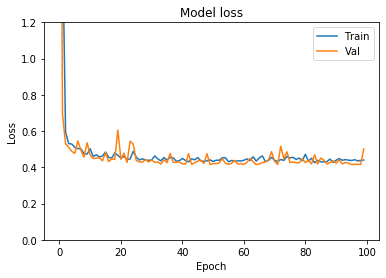

In [33]:
#overfitting is less, plotted with the same parameters of overfitted model 2. Training and validation loss are very similar

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

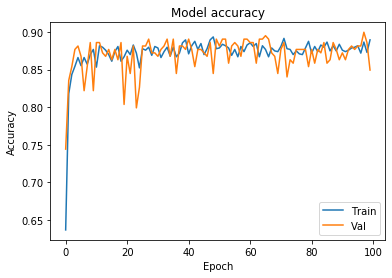

In [35]:
#accuracy is also similar between both sets
#Summary: you can slightly fix overfitted models by using regularization

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()